In [10]:
%matplotlib inline

import matplotlib as plt
import numpy as np
import pandas as pd

In [3]:
train_df = pd.read_csv("data/train.csv")
transactions_df = pd.read_csv("data/historical_transactions.csv")

In [4]:
train_df.describe()

,feature_1,feature_2,feature_3,target
count,201917.000000,201917.000000,201917.000000,201917.000000
mean,3.105311,1.745410,0.565569,-0.393636
std,1.186160,0.751362,0.495683,3.850500
min,1.000000,1.000000,0.000000,-33.219281
25%,2.000000,1.000000,0.000000,-0.883110
50%,3.000000,2.000000,1.000000,-0.023437
75%,4.000000,2.000000,1.000000,0.765453
max,5.000000,3.000000,1.000000,17.965068


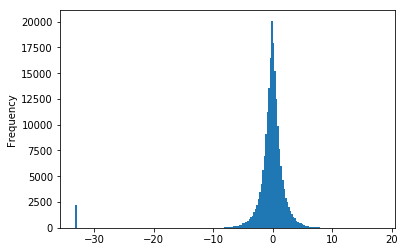

In [10]:
train_df["target"].plot.hist(bins=200)

In [7]:
transactions_df.describe()

,city_id,installments,merchant_category_id,month_lag,purchase_amount,category_2,state_id,subsector_id
count,2.911236e+07,2.911236e+07,2.911236e+07,2.911236e+07,2.911236e+07,2.645950e+07,2.911236e+07,2.911236e+07
mean,1.293256e+02,6.484954e-01,4.810130e+02,-4.487294e+00,3.640090e-02,2.194578e+00,1.056679e+01,2.684839e+01
std,1.042563e+02,2.795577e+00,2.493757e+02,3.588800e+00,1.123522e+03,1.531896e+00,6.366927e+00,9.692793e+00
min,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.300000e+01,-7.469078e-01,1.000000e+00,-1.000000e+00,-1.000000e+00
25%,5.300000e+01,0.000000e+00,3.070000e+02,-7.000000e+00,-7.203559e-01,1.000000e+00,9.000000e+00,1.900000e+01
50%,9.000000e+01,0.000000e+00,4.540000e+02,-4.000000e+00,-6.883495e-01,1.000000e+00,9.000000e+00,2.900000e+01
75%,2.120000e+02,1.000000e+00,7.050000e+02,-2.000000e+00,-6.032543e-01,3.000000e+00,1.600000e+01,3.400000e+01
max,3.470000e+02,9.990000e+02,8.910000e+02,0.000000e+00,6.010604e+06,5.000000e+00,2.400000e+01,4.100000e+01


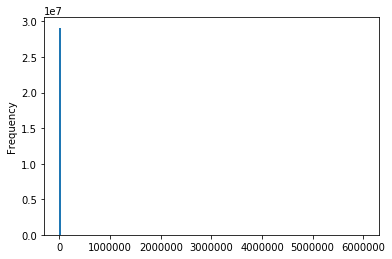

In [9]:
transactions_df["purchase_amount"].plot.hist(bins=200)

Para fazer a análise desses dados com os outliers do target vamos fazer uma remoção deles colocando eles em uma blacklist

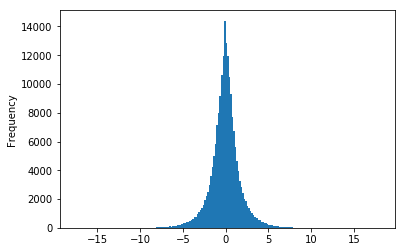

In [4]:
pure_train = train_df[train_df["target"] > -30]
pure_train["target"].plot.hist(bins=200)

Agora vamos utilizar o modelo dos outliers

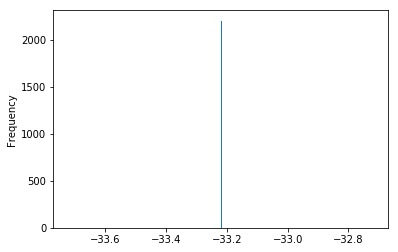

In [17]:
outliers_train = train_df[train_df["target"] <= -30]
outliers_train["target"].plot.hist(bins=200)

In [18]:
outliers_train.describe()

,feature_1,feature_2,feature_3,target
count,2207.000000,2207.000000,2207.000000,2.207000e+03
mean,3.224286,1.782510,0.591300,-3.321928e+01
std,1.207783,0.810069,0.491705,7.107038e-15
min,1.000000,1.000000,0.000000,-3.321928e+01
25%,2.000000,1.000000,0.000000,-3.321928e+01
50%,3.000000,2.000000,1.000000,-3.321928e+01
75%,4.000000,2.000000,1.000000,-3.321928e+01
max,5.000000,3.000000,1.000000,-3.321928e+01


In [21]:
percentage = outliers_train.count()/train_df.count()
percentage*100

first_active_month    1.093023
card_id               1.093023
feature_1             1.093023
feature_2             1.093023
feature_3             1.093023
target                1.093023
dtype: float64

Para fazer as predições o ideal é criar dois modelos, um para prever se o card_id é um outlier ou não. Para isso podemos tentar fazer uso de um modelo simples de regressão logística. Porém, para realizar essas atividades seria um esforço grande para um pequeno resultado, uma vez que o outliers são estritamente 1.1% dos dados do dataset

In [45]:
df_tuples = outliers_train[["feature_1", "feature_2", "feature_3"]].apply(tuple, axis=1)
df_dummies = pd.get_dummies(df_tuples)
df_dummies.columns = list(range(len(df_dummies.columns)))
s = pd.Series(df_dummies.columns[np.where(df_dummies != 0)[1]])
s.index = df_tuples.index
outliers_train["class"] = s
outliers_train.head()

/Users/caiogomes/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,first_active_month,card_id,feature_1,feature_2,feature_3,target,class
64,2017-09,C_ID_8186f3fcc1,3.0,1.0,1.0,-33.219281,6
92,2015-05,C_ID_b9379a30ea,3.0,3.0,1.0,-33.219281,8
125,2015-10,C_ID_e9120f535c,3.0,3.0,1.0,-33.219281,8
151,2017-03,C_ID_65715cb80d,4.0,2.0,0.0,-33.219281,10
225,2017-01,C_ID_ae77d244b6,2.0,1.0,0.0,-33.219281,3


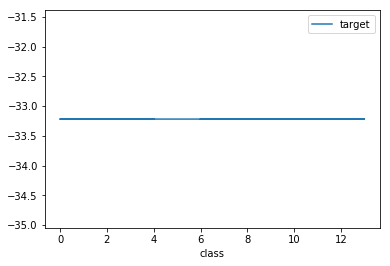

In [48]:
outliers_train.plot(x="class", y="target")

Como nenhum resultado foi conclusivo, vamos ignorar momentaneamente essas análises e seguir em frente para realizar a predição dos tipos de dados presentes no dataset de treinamento. Porém, podemos utilizar a técnica que aprendemos dessa análise momentanea do conjunto de dados de outliers para que possamos fazer uso dessas técnicas em relação a fazer o 1 hot encoding para cada tupla de features e assim podemos fazer um plot do estudo estatístico para cada uma dessas categorias de features e utilizar elas como base para realizar as nossas predições e posteriormente juntar com os dados de transações.

In [59]:
def mixClasses(dataframe, column_names):
    #Obs: This method won't find out the dict properly
    tuples = dataframe[column_names].apply(tuple, axis=1)
    dummies = pd.get_dummies(tuples)
    dummies.columns = list(range(len(dummies.columns))) # convert the dummies to numbers
    s = pd.Series(dummies.columns[np.where(dummies != 0)[1]])
    s.index = tuples.index
    return s

s = mixClasses(pure_train, ["feature_1", "feature_2", "feature_3"])
pure_train.loc["class"] = s
groups = pure_train.groupby(by="class")
groups["target"].describe()

/Users/caiogomes/miniconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,count,mean,std,min,25%,50%,75%,max
class,,,,,,,,
0.0,6473.0,-0.047427,1.695106,-17.492640,-0.750166,-0.009055,0.674554,15.011358
1.0,2801.0,0.072014,1.798173,-9.577282,-0.713134,0.000000,0.764481,11.553597
2.0,2666.0,-0.176228,1.514510,-7.737818,-0.913521,-0.144806,0.581198,10.139105
3.0,24174.0,0.035844,1.509869,-15.835656,-0.674639,0.062362,0.772621,13.592223
4.0,24270.0,-0.032791,1.697330,-12.304637,-0.868711,-0.036210,0.791799,10.474853
5.0,6761.0,0.006067,1.521257,-10.156083,-0.745751,-0.006531,0.757648,13.350895
6.0,24436.0,-0.032338,1.804713,-15.553269,-0.907759,-0.036243,0.840913,12.446308
7.0,24224.0,-0.034170,1.891880,-17.608147,-0.964037,-0.032211,0.891464,15.606405
8.0,24142.0,-0.022626,1.763529,-11.359914,-0.880842,-0.000474,0.827387,11.291580


## Count

<BarContainer object of 15 artists>

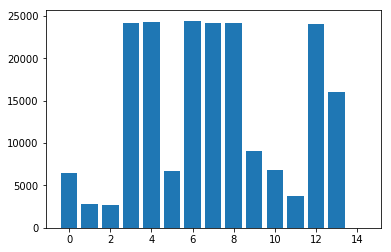

In [78]:
idx = groups.count().index
counts = groups.count()["target"]
x = list(idx.values)
y = list(counts.values)
plt.pyplot.bar(x, y)

## Standard Deviation

<BarContainer object of 15 artists>

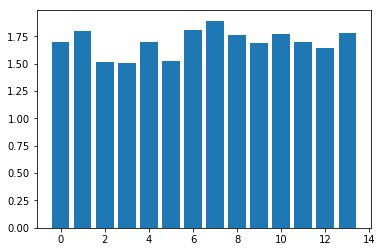

In [79]:
idx = groups.std().index
counts = groups.std()["target"]
x = list(idx.values)
y = list(counts.values)
plt.pyplot.bar(x, y)

## Min Max

In [9]:
# @hidden_cell
#min
idx = groups.max().index
counts = groups.max()["target"]
x = list(idx.values)
y = list(counts.values)
plt.pyplot.bar(x, y)

# max
idx = groups.min().index
counts = groups.min()["target"]
x = list(idx.values)
y = list(counts.values)
plt.pyplot.bar(x, y)

NameError: name 'groups' is not defined

## Mean

<BarContainer object of 15 artists>

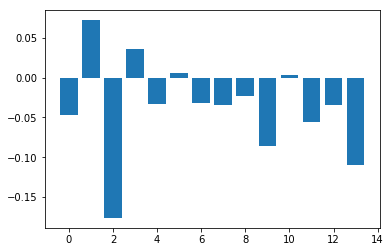

In [87]:
# mean
idx = groups.mean().index
counts = groups.mean()["target"]
x = list(idx.values)
y = list(counts.values)
plt.pyplot.bar(x, y)

Em linhas gerais podemos dizer que os valores que tem os mínimos e máximos mais extendidos tem na realidade haver com o número de dados que estão alí presentes, pois em geral as maiores variações coincidem com um número de dados maior, então essas features atribuídas não devem nos dar muitos resultados, até porque o desvio padrão é aproximadamente o mesmo para todos esses dados e o valor médio em geral não chega sequer a uma diferença de 0.2 da origem da gaussiana em todas as categorias e portanto podemos dizer que as features em conjunto não separam o conjunto de dados de uma forma satisfatória de forma que devemos observar outros dados, principalmente os dados de transações e buscar respostas na classe de dados de período de adesão que pode revelar grandes informações sobre esse conjunto de dados antes de passarmos para um modelo de predição com baixa fidelidade

# O Dataset de Transações

Para esse dataset temos a documentação de que há um campo denominado _authorized\_flag_ que contém o status de se aquela transação foi aprovada ou não. Isso é extremamente importante de se buscar pois isso pode significar que as transações negadas tenham uma ligação direta com o score de lealdade. As primeiras hipóteses são que:  

 - Um maior número de transações tem ligação direta com o score
 - Um maior número de transações aprovadas tem ligação direta com o score
 - Um maior número de trasações negadas tem ligação direta com o score
  
**Obs:** O dataset de transações vai ser utilizado diretamente para evitar que seja carregado novamente na memória

In [105]:
# Aqui faremos a contagem de transações de cada cartão de crédito
transactions_count = transactions_df.groupby(by="card_id").count()["purchase_date"]
transactions_count.head()

card_id
C_ID_00007093c1    149
C_ID_0001238066    123
C_ID_0001506ef0     66
C_ID_0001793786    216
C_ID_000183fdda    144
Name: purchase_date, dtype: int64

In [132]:
try:
    pure_train = pure_train.drop(labels=["count"], axis=1)
except:
    pass

pure_train = pd.merge(pure_train, 
         pd.DataFrame({"card_id":transactions_count.index, "count": transactions_count.values}), 
         on=["card_id"])

pure_train.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,target,class,count
0,2017-06,C_ID_92a2005557,5.0,2.0,1.0,-0.820283,13.0,260
1,2017-01,C_ID_3d0044924f,4.0,1.0,0.0,0.392913,9.0,350
2,2016-08,C_ID_d639edf6cd,2.0,2.0,0.0,0.688056,4.0,43
3,2017-09,C_ID_186d6a6901,4.0,3.0,0.0,0.142495,11.0,77
4,2017-11,C_ID_cdbd2c0db2,1.0,3.0,0.0,-0.159749,2.0,133


<BarContainer object of 1022 artists>

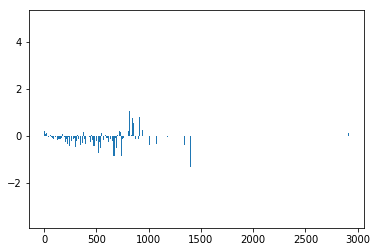

In [142]:
idx = pure_train.groupby(by="count")["target"].mean().index.values
values = pure_train.groupby(by="count")["target"].mean().values

# type(values)
plt.pyplot.bar(idx, values)

Podemos ver baseado nisso que em geral temos uma situação em que a média é negativa para a maior parte das regiões e que há uma região ideal em que essa média é positiva, devemos utilizar um dado mais bruto que a média para verificar então os valores

<BarContainer object of 1022 artists>

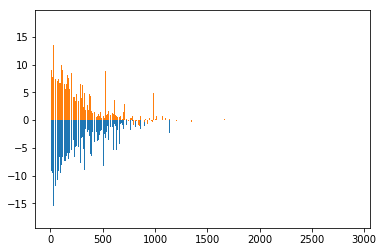

In [143]:
idx = pure_train.groupby(by="count")["target"].min().index.values
values = pure_train.groupby(by="count")["target"].min().values

plt.pyplot.bar(idx, values)


idx = pure_train.groupby(by="count")["target"].max().index.values
values = pure_train.groupby(by="count")["target"].max().values

plt.pyplot.bar(idx, values)

O que podemos deduzir dessa análise é que há uma clara redução de mínimos e máximos a medida que o número de transações aumenta, o que pode significar uma redução no número de valores para cada um desses counts ou uma real redução de variação desse score

<BarContainer object of 1022 artists>

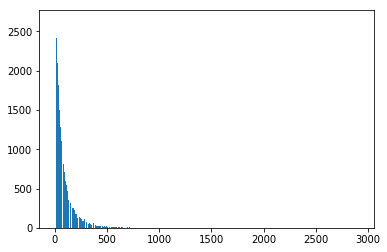

In [144]:
idx = pure_train.groupby(by="count")["target"].count().index.values
values = pure_train.groupby(by="count")["target"].count().values

plt.pyplot.bar(idx, values)

Vemos que na verdade o que detectamos é uma redução exponencial do número de transações, o que causa essa redução de variabilidade dos dados.  
  
---
Vamos aproveitar essa metodologia adotada previamente para continuar nossas análises dessa vez correlacionando as transações recusadas e as aprovadas

In [147]:
# Aqui faremos a contagem de transações recusadas de cada cartão de crédito
denied_count = transactions_df[transactions_df["authorized_flag"] == "N"].groupby(by="card_id").count()["purchase_date"]
denied_count.head()


card_id
C_ID_00007093c1    35
C_ID_0001238066     3
C_ID_0001506ef0     4
C_ID_0001793786    27
C_ID_000183fdda     7
Name: purchase_date, dtype: int64

In [148]:
denied_train = pure_train

In [149]:
try:
    denied_train = pure_train.drop(labels=["count"], axis=1)
except:
    pass

denied_train = pd.merge(denied_train, 
         pd.DataFrame({"card_id":denied_count.index, "count": denied_count.values}), 
         on=["card_id"])

denied_train.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,target,class,count
0,2017-06,C_ID_92a2005557,5.0,2.0,1.0,-0.820283,13.0,13
1,2017-01,C_ID_3d0044924f,4.0,1.0,0.0,0.392913,9.0,11
2,2016-08,C_ID_d639edf6cd,2.0,2.0,0.0,0.688056,4.0,2
3,2017-11,C_ID_cdbd2c0db2,1.0,3.0,0.0,-0.159749,2.0,5
4,2016-09,C_ID_0894217f2f,4.0,2.0,0.0,0.871585,10.0,1


<BarContainer object of 208 artists>

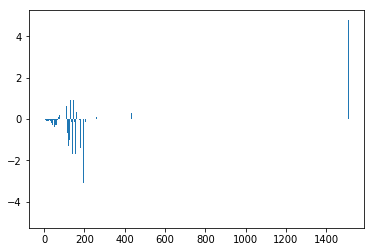

In [150]:
idx = denied_train.groupby(by="count")["target"].mean().index.values
values = denied_train.groupby(by="count")["target"].mean().values

# type(values)
plt.pyplot.bar(idx, values)

Já podemos notar aqui que as regiões tem valores médios no mínimo mais marcantes

<BarContainer object of 208 artists>

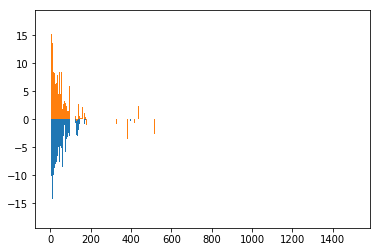

In [151]:
idx = denied_train.groupby(by="count")["target"].min().index.values
values = denied_train.groupby(by="count")["target"].min().values

plt.pyplot.bar(idx, values)


idx = denied_train.groupby(by="count")["target"].max().index.values
values = denied_train.groupby(by="count")["target"].max().values

plt.pyplot.bar(idx, values)

<BarContainer object of 208 artists>

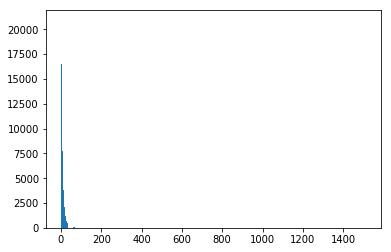

In [152]:
idx = denied_train.groupby(by="count")["target"].count().index.values
values = denied_train.groupby(by="count")["target"].count().values

plt.pyplot.bar(idx, values)

O mesmo fenômeno se mostrou aqui, o que pode ficar claro que ele deve estar mais presente para usuários que tenham esses dados também, porém, o número de transações recusadas de um mesmo cartão é bem menor do que o número de transações realizadas por ele para cada entidade  
  
Vamos agora testar a hipótese que a média de dinheiro já transacionado influencia nesse score

In [5]:
# Aqui faremos a contagem de transações recusadas de cada cartão de crédito
acc_mean = transactions_df[transactions_df["authorized_flag"] == "Y"].groupby(by="card_id").mean()["purchase_amount"]
acc_mean.head()


card_id
C_ID_00007093c1   -0.547746
C_ID_0001238066   -0.588811
C_ID_0001506ef0   -0.511227
C_ID_0001793786   -0.132067
C_ID_000183fdda   -0.495595
Name: purchase_amount, dtype: float64

In [6]:
try:
    acc_train = acc_train.drop(labels=["count"], axis=1)
except:
    pass

acc_train = pd.merge(pure_train, 
         pd.DataFrame({"card_id":acc_mean.index, "count": acc_mean.values}), 
         on=["card_id"])

acc_train.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,target,count
0,2017-06,C_ID_92a2005557,5,2,1,-0.820283,-0.637235
1,2017-01,C_ID_3d0044924f,4,1,0,0.392913,-0.616175
2,2016-08,C_ID_d639edf6cd,2,2,0,0.688056,-0.678742
3,2017-09,C_ID_186d6a6901,4,3,0,0.142495,-0.642745
4,2017-11,C_ID_cdbd2c0db2,1,3,0,-0.159749,-0.539379


199351 199351


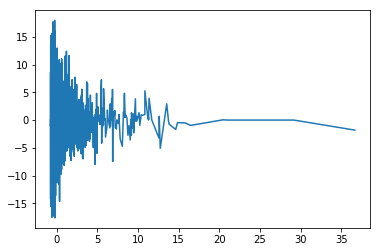

In [7]:
idx = acc_train.groupby(by="count")["target"].mean().index.values
values = acc_train.groupby(by="count")["target"].mean().values

# idx = [(i//100)*100 for i in idx]
# values = [(v//15)*15 for v in values]

plt.pyplot.plot(idx, values)
print(len(idx), len(values))
# plt.pyplot.bar(idx, values)